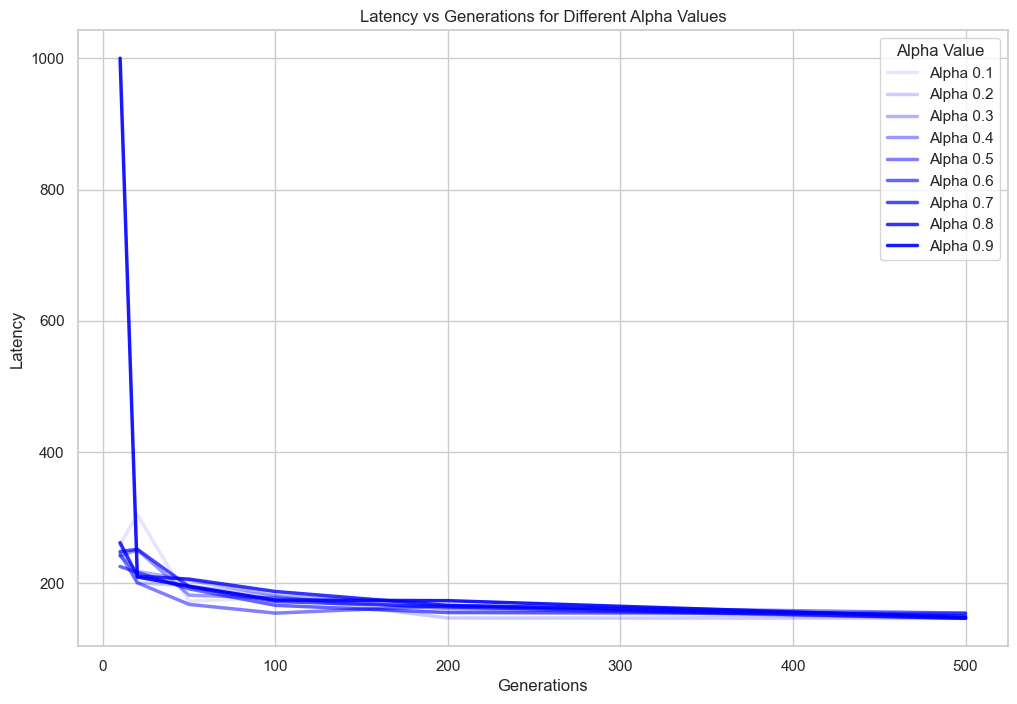

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the file
file_path = 'results.csv'
data = pd.read_csv(file_path)

# Filtering out the 'placement_physical' column
filtered_data = data.drop(columns=['placement_physical'])

# Creating the plot with the same color and different transparency levels
plt.figure(figsize=(12, 8))

# Unique alpha values
unique_alphas = filtered_data['alpha'].unique()
n_alphas = len(unique_alphas)

# Plot each line with different alpha (transparency)
for i, alpha in enumerate(sorted(unique_alphas)):
    subset = filtered_data[filtered_data['alpha'] == alpha]
    plt.plot(subset['generations'], subset['latency'], label=f'Alpha {alpha}', 
             color='blue', alpha=(i+1)/(n_alphas+1), linewidth=2.5)

plt.title('Latency vs Generations for Different Alpha Values')
plt.xlabel('Generations')
plt.ylabel('Latency')
plt.legend(title='Alpha Value', loc='upper right')
plt.show()


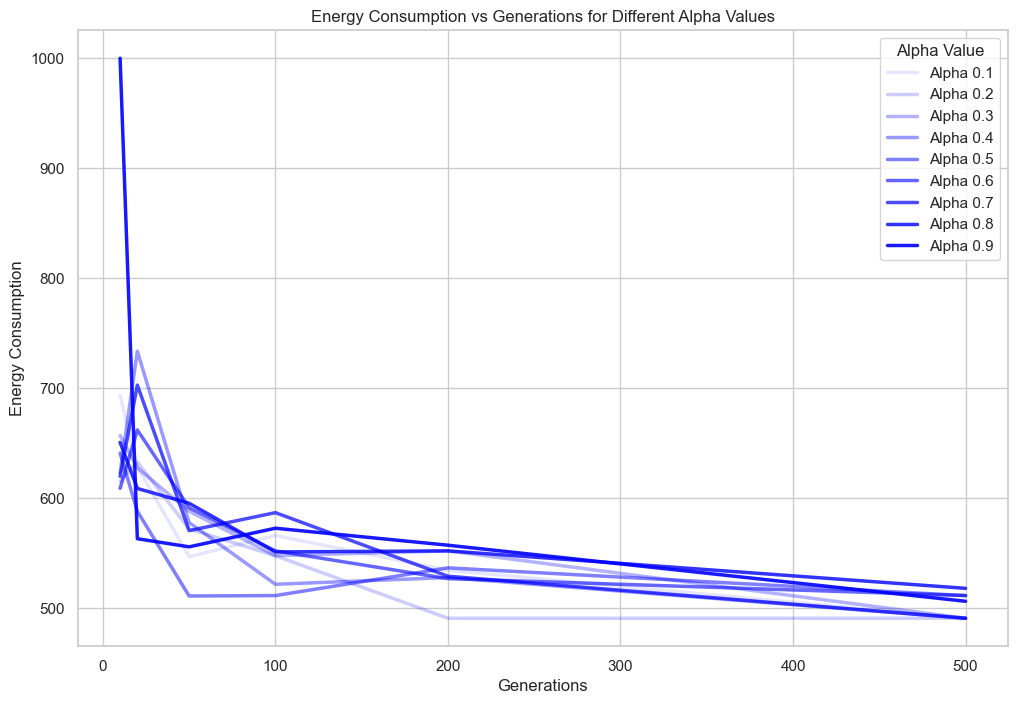

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the file
file_path = 'results.csv'
data = pd.read_csv(file_path)

# Filtering out the 'placement_physical' column
filtered_data = data.drop(columns=['placement_physical'])

# Creating the plot with the same color and different transparency levels
plt.figure(figsize=(12, 8))

# Unique alpha values
unique_alphas = filtered_data['alpha'].unique()
n_alphas = len(unique_alphas)

# Plot each line with different alpha (transparency)
for i, alpha in enumerate(sorted(unique_alphas)):
    subset = filtered_data[filtered_data['alpha'] == alpha]
    plt.plot(subset['generations'], subset['energy'], label=f'Alpha {alpha}', 
             color='blue', alpha=(i+1)/(n_alphas+1), linewidth=2.5)

plt.title('Energy Consumption vs Generations for Different Alpha Values')
plt.xlabel('Generations')
plt.ylabel('Energy Consumption')
plt.legend(title='Alpha Value', loc='upper right')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


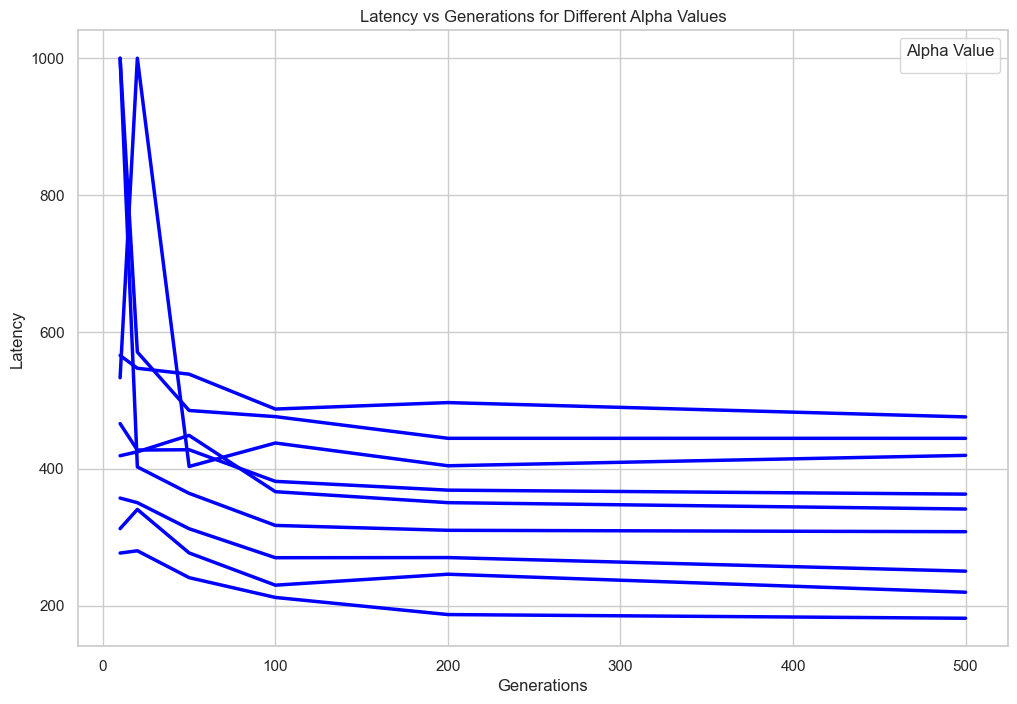

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the file
file_path = 'results.csv'
data = pd.read_csv(file_path)

# Filtering out the 'placement_physical' column
filtered_data = data.drop(columns=['placement_physical'])

# Creating the plot with the same color and different transparency levels
plt.figure(figsize=(12, 8))

# Unique alpha values
unique_alphas = filtered_data['alpha'].unique()
n_alphas = len(unique_alphas)

# Plot each line with different alpha (transparency)
for i, alpha in enumerate(sorted(unique_alphas)):
    subset = filtered_data[filtered_data['alpha'] == alpha]
    plt.plot(subset['generations'], subset['latency']*subset['alpha'] + subset['energy'] *subset['beta'],
             color='blue', linewidth=2.5)

plt.title('Latency vs Generations for Different Alpha Values')
plt.xlabel('Generations')
plt.ylabel('Latency')
plt.legend(title='Alpha Value', loc='upper right')
plt.show()


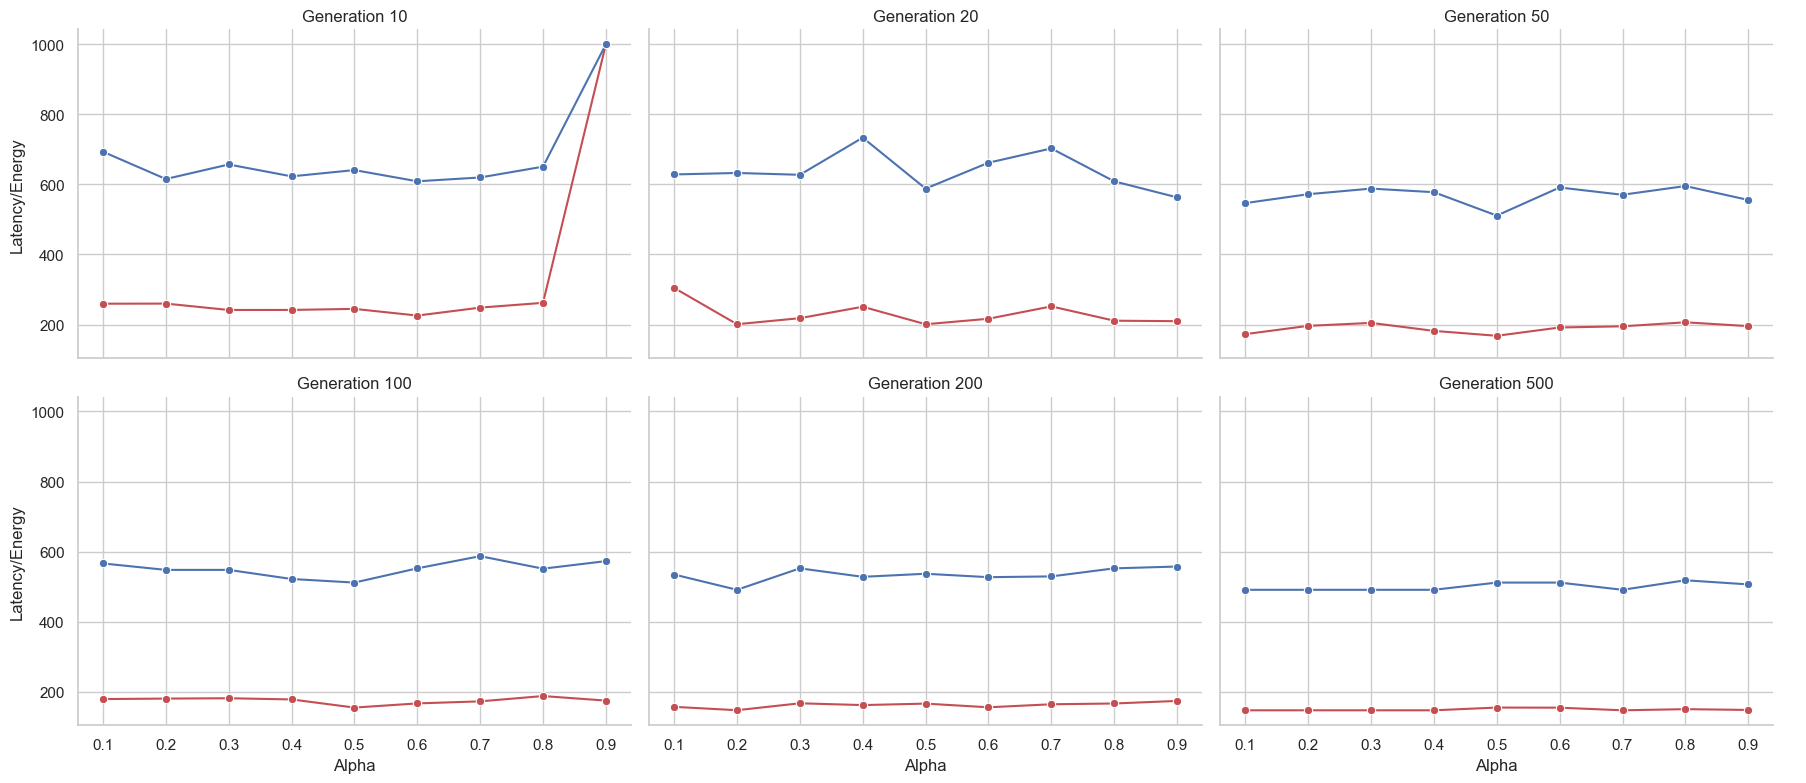

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the file
file_path = 'results.csv'
data = pd.read_csv(file_path)

# Setting up the facet grid for latency
g_line = sns.FacetGrid(data, col='generations', col_wrap=3, height=4, aspect=1.5)
g_line.map_dataframe(sns.lineplot, x='alpha', y='latency', marker='o', color='r')
g_line.map_dataframe(sns.lineplot, x='alpha', y='energy', marker='o', color='b')
g_line.add_legend()
g_line.set_titles("Generation {col_name}")
g_line.set_axis_labels("Alpha", "Latency/Energy")

plt.show()
